In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import ml_collections 
import deepchest

In [2]:
config = ml_collections.ConfigDict()

config.batch_size = 10
config.num_steps = 300

# See preprocessing.py, if you replace with ";" no preprocessing is done
config.preprocessing_train_eval = "independent_dropout(.2);"

config.use_validation_split = False

# If validation split is false, then train will have 4/5 of data and test 1/5
# If validation split is true, then train will have 3/5 of data, test 1/5 and val 1/5
config.num_folds = 5 

# gpu workers
config.num_workers = 0

# dataset 
config.images_directory = "dataset/images/"
config.labels_file = "dataset/labels/diagnostic.csv"

# Where the indices are saved
config.save_dir = "model_saved/"
config.export_folds_indices_file = "indices.csv"

# Don't modify these (should not have been in the config)
config.test_fold_index = 0
config.delta_from_test_index_to_validation_index = 1

In [3]:
train_loader, test_loader, validation_loader = deepchest.dataset.get_data_loaders(
         config=config
    )

/usr/local/anaconda3/envs/test_lus/lib/python3.9/site-packages/torchvision/transforms/transforms.py:852: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


Split infos:


┏━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓
┃ split ┃ size ┃ negative ┃  positive ┃
┡━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩
│ train │  229 │ 70 (31%) │ 159 (69%) │
│ test  │   57 │ 17 (30%) │  40 (70%) │
└───────┴──────┴──────────┴───────────┘

In [4]:
batch = next(iter(train_loader))
images = batch["images"]
labels = batch["label"]
masks = batch["mask"]
sites = batch["sites"]

Patient 0 | label = 1


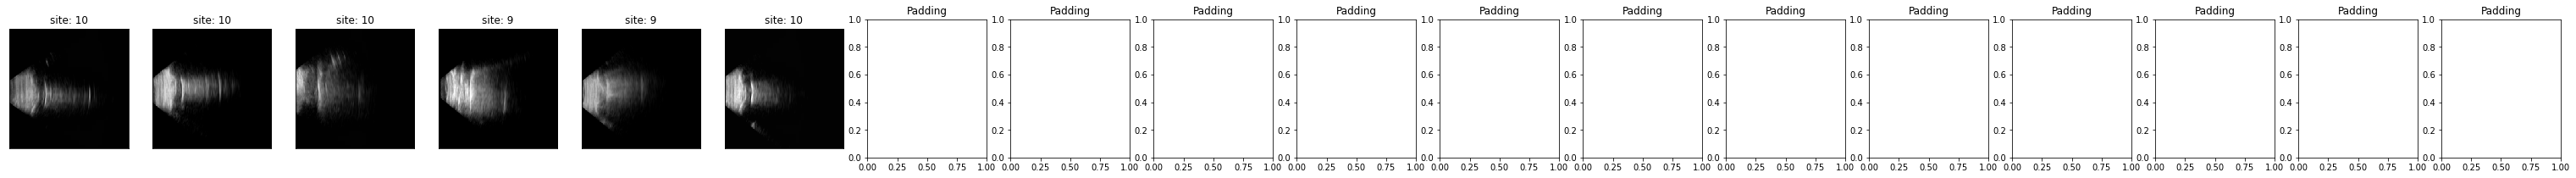

Patient 1 | label = 0


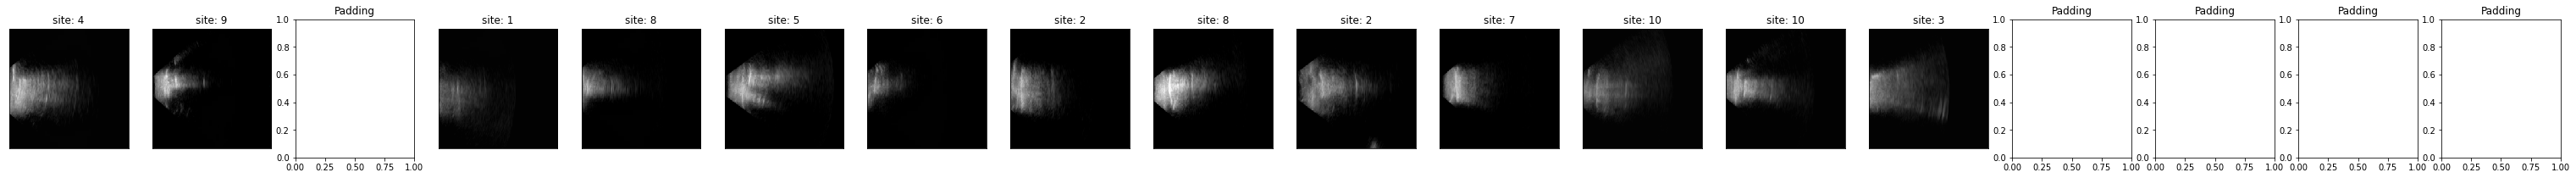

Patient 2 | label = 0


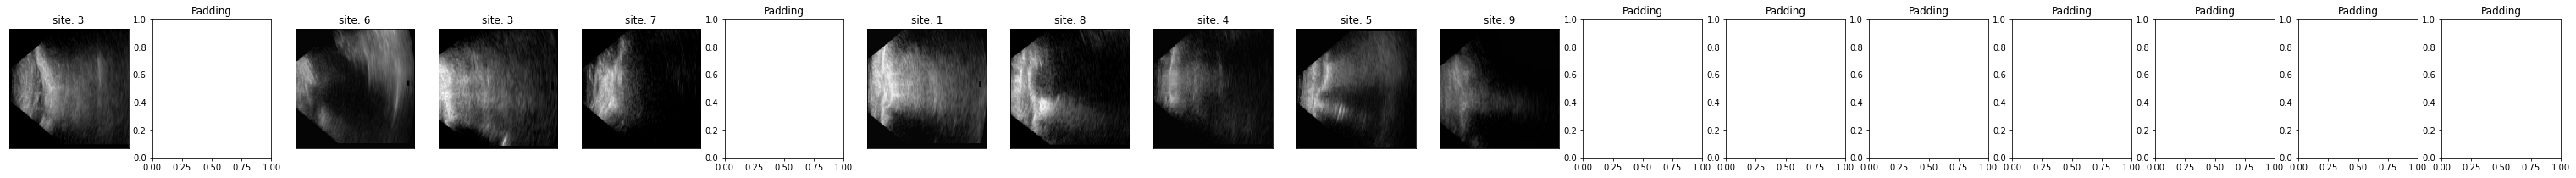

Patient 3 | label = 1


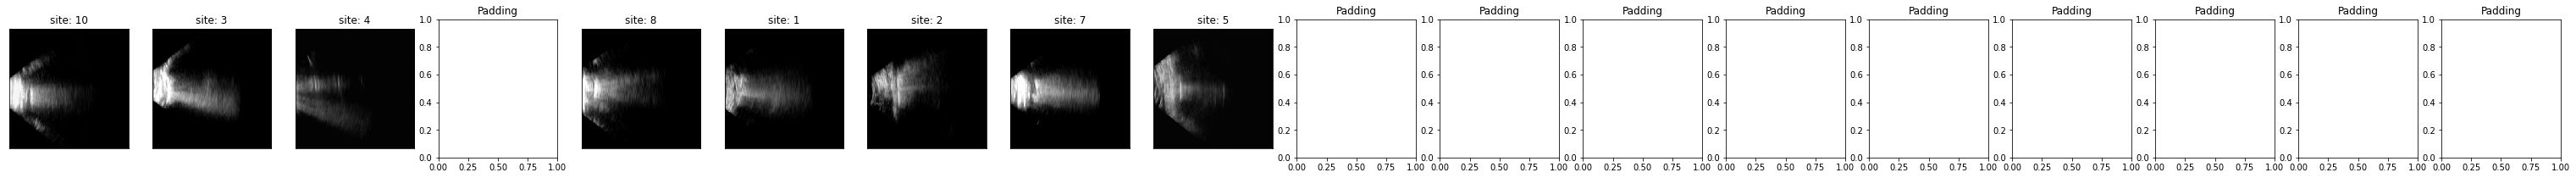

Patient 4 | label = 0


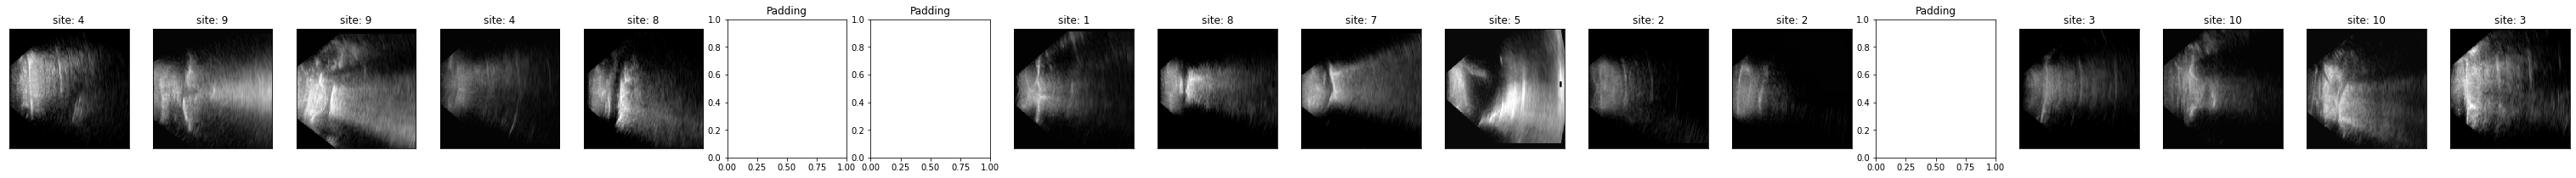

Patient 5 | label = 0


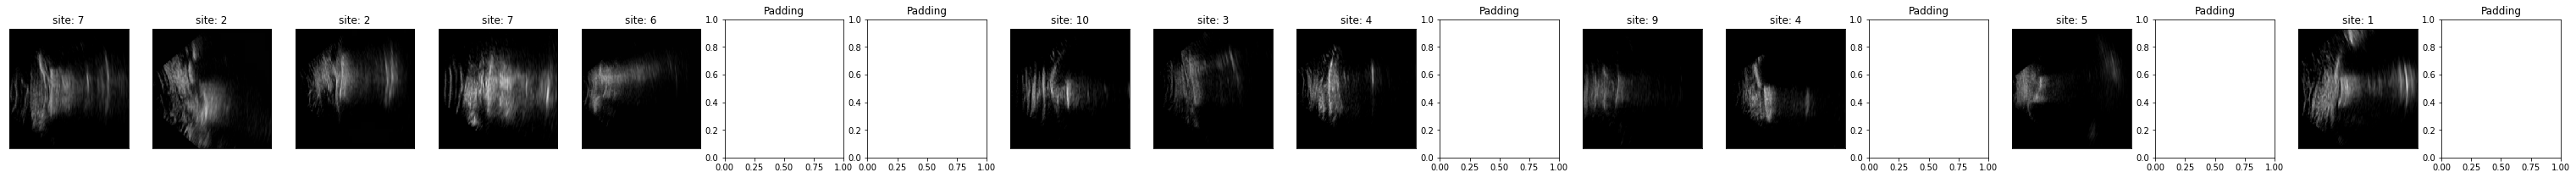

Patient 6 | label = 1


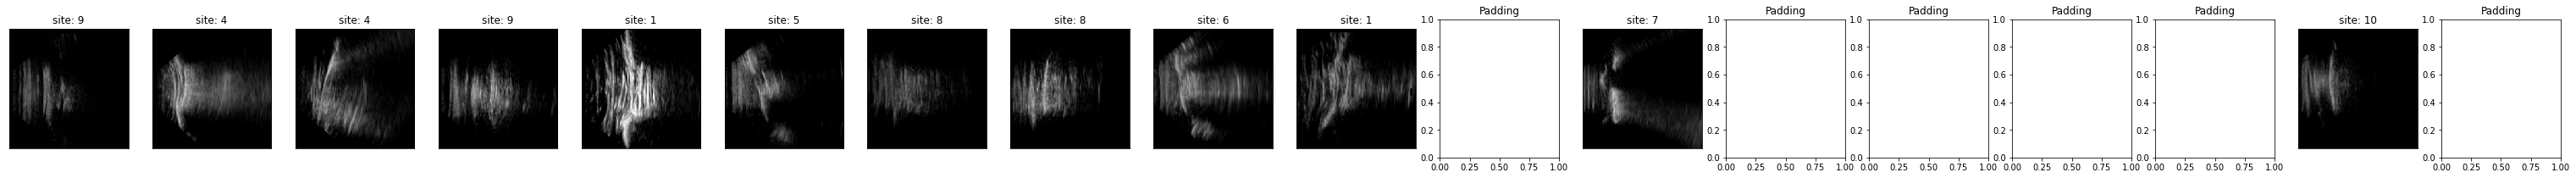

Patient 7 | label = 1


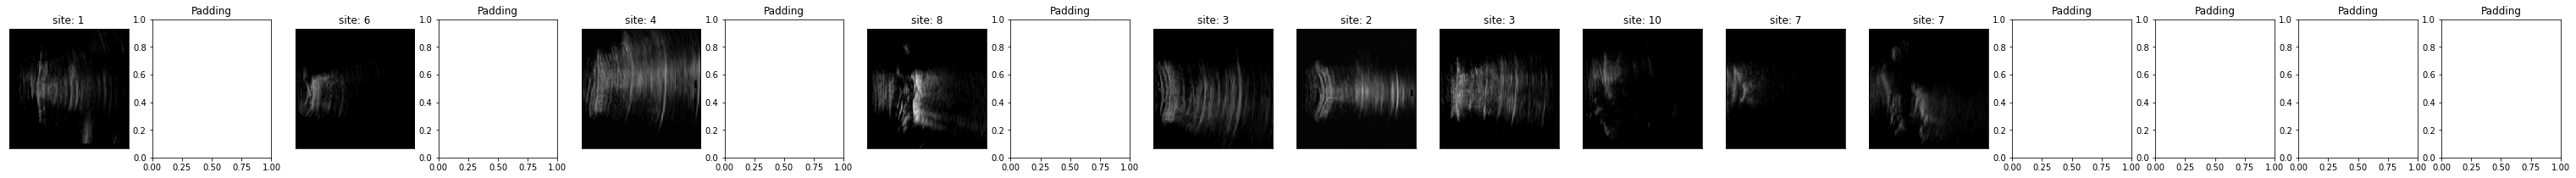

Patient 8 | label = 0


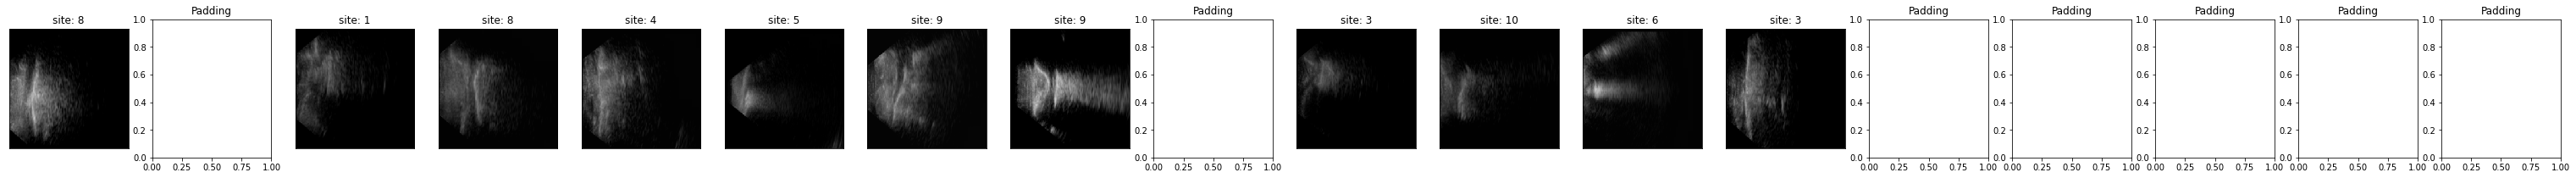

Patient 9 | label = 1


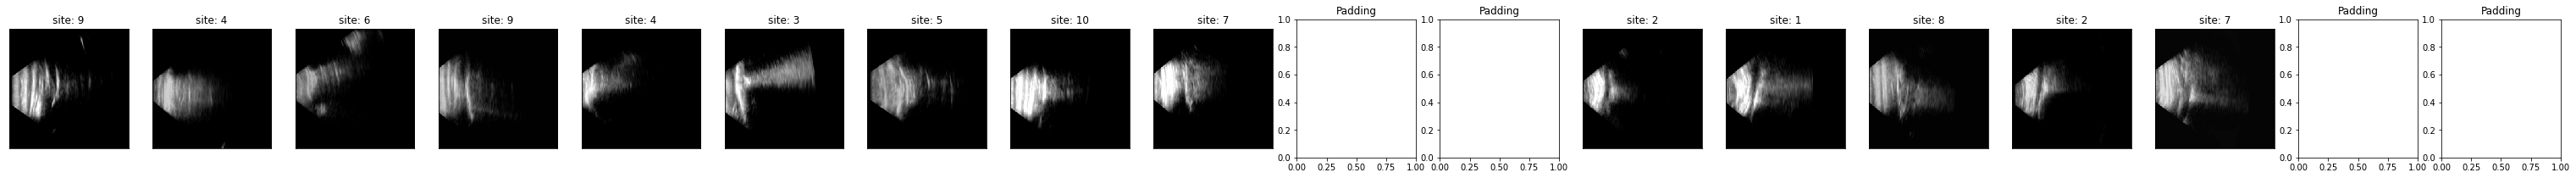

In [5]:
for patient_i, (patient_images, label, mask, site) in enumerate(zip(images, labels, masks, sites)):
    print(f"Patient {patient_i} | label = {label.item()}")
    num_images = masks.shape[-1]

    f, axes = plt.subplots(1, num_images, figsize=(3*num_images, 3))
    for im, not_padding, ax, st in zip(patient_images, mask, axes, site):
        if not_padding > 0:
            ax.title.set_text('site: {}'.format(st))
            ax.matshow(im.transpose(0, 2))
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.title.set_text('Padding')

    plt.show()

How to evaluate model (you can also use your own methods)

label_names = utils.get_label_names(config.labels_file)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0") if use_cuda else torch.device("cpu") 

scores, labels = utils.model_evaluation(**model**, train_loader, device)
train_metrics = utils.compute_metrics(labels, scores, label_names)

train_metrics